In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
 1 "neonatal sepsis"
    2 "preterm" 
    3 "asphyxia" 
    4 "lowbirth weight"
    5 "neonatal conjunctivitis" 
    6 "neonatal tetanus" 
    7 "neonatal herpes" 
    8 "neonatal meningitis"
    9 "neontal jaundice" 
10 "respiratory distress syndrome" 
11 "congenital malformation" 12 "other specify"                          

In [ ]:
#babydob: date of birth of the child
#babysex: sex of the new child
#cddeath...date of death
#codpremature....cause of death prematurity
#codjdice.....Cause of death - Jaundice
#codbirthasphyx.....Cause of death - Birth asphyxia
#codpna......Cause of death - Pneumonia
#codsepsis.....Cause of death - Sepsis
#codtetanus.......Cause of death - Tetanus
#codcongenmal....Cause of death - Congenital malformation

#Was diarrhea the cause of death(cc1 cc2 cf1)
#Was measles the causes of death(cc1 cc2 cf1)
#Was malaria the cause of death(cc1 cc2 cf1)

#b: variables included in birth forms BF1 and BC1
   #•	BF1: Birth – catchment and non-catchment 
   #•	BC1: Births 
#NC2=Neonatal Follow-up: Day 6, 28, 42 Community
#NF2=Neonatal Follow-up: Day 6, 28, 42 Facility
#NC2-Nf2
#NC3=Neonatal morbidity (Community)
#NF3: Neonatal outpatient visit
#NF5: Neonatal discharge
#CC1: 29 days - 2 years child morbidity (Community)
#CF1: 29 days – 2 years child morbidity (OPD visits)
#CF2: 29 days – 2 years child morbidity (Admissions)
#BF1: Birth Facility

In [2]:
#child death forms 
nc2_nf2 nc3 nf3 nf5 cc1 cc2 cf1  

In [3]:
data=pd.read_csv('all_data_combined.csv', low_memory=False)

In [4]:
data.head(5)

,uuid,cuuid,intdt_enroll,enroll,dodel,mch_preg,mresp_enroll,enrollloc_enroll,enrollfac_enroll,enrollhosp_enroll,...,chless2_enroll,multpreg_enroll,gapyrs_enroll,pmhcsec_enroll,pmho_enroll,lpregplan_enroll,Reltoresp_enroll,mvital_enroll,mloc_enroll,mloco_enroll
0,00016e3719814832950c614943840c06,13e0695f-bc05-4328-98f5-d61724cb3302,16jan2020,p1,04Jan2020,1,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00094e3a601f438fbf397fe5a258a0c5,7cf3835d6f68426c943f7214196f9b01,24dec2018,m1,NaN,1,1.0,NaN,NaN,NaN,...,1.0,NaN,4.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN
2,00094e3a601f438fbf397fe5a258a0c5,1b263122-3dcb-48e4-804b-a3d917f28ef7,29oct2019,p1,29Oct2019,2,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000a09920c004dc4872ce3e9d8be2b51,5190080b-cbc4-4fbf-8c44-e1558af43d5e,04jun2019,p1,06Jul2019,1,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00156f4dbcda4715b38ef830395b2f5a,0ab0b3d8-3f80-4883-92d8-08f95e131c22,21nov2019,p1,26Jan2020,1,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
len(data)

4634

In [175]:
data.dtypes

uuid                 object
cuuid                object
intdt_enroll         object
enroll               object
dodel                object
                     ...   
lpregplan_enroll    float64
Reltoresp_enroll    float64
mvital_enroll       float64
mloc_enroll         float64
mloco_enroll         object
Length: 11039, dtype: object

In [95]:
data.shape

(4634, 11039)

In [ ]:
#Filter causes of death from the following forms
   #1. nc2_nf2 
   #2. nc3 
   #3. nf3 
   #4. nf5 
   #5. cc1 
   #6. cc2 
   #7. cf1 

In [ ]:
#b: variables included in birth forms BF1 and BC1
   #•	BF1: Birth – catchment and non-catchment 
   #•	BC1: Births 

In [6]:
#Total number of alive children
data['cddeath_b'].isnull().sum()

4548

In [52]:
#Total Number of death from  BF1 and BC1 forms 
4634-data['cddeath_b'].isnull().sum()

86

In [54]:
#Total Number of death from  nc2_nf2_1 forms 
4634-data['cddeath_nc2_nf2_1'].isnull().sum()

23

In [124]:
nc2_nf2_1=nc2_nf2_1.rename(columns={'cddeath_nc2_nf2_1':'Death',
                                    'codbirthasphyx_nc2_nf2_1':'Asphyxia',
                                   'codpremature_nc2_nf2_1':'prematurity',
                                  'codjdice_nc2_nf2_1':'neontal jaundice', 
                                   'codpna_nc2_nf2_1':'Pneumonia',
                                   'codsepsis_nc2_nf2_1':'neonatal sepsis',
                                   'codtetanus_nc2_nf2_1':'neonatal tetanus',
                                   'codcongenmal_nc2_nf2_1':'congenital malformation',
                                   'codo_nc2_nf2_1':'Others',
                                   'coduk_nc2_nf2_1':'Un known'})

In [97]:
nc2_nf2_1=data[['cddeath_nc2_nf2_1','codbirthasphyx_nc2_nf2_1','codpremature_nc2_nf2_1','codjdice_nc2_nf2_1','codpna_nc2_nf2_1','codsepsis_nc2_nf2_1','codtetanus_nc2_nf2_1','codcongenmal_nc2_nf2_1','codo_nc2_nf2_1','coduk_nc2_nf2_1']]

In [98]:
nc2_nf2_1 = nc2_nf2_1[nc2_nf2_1.notnull().all(axis=1)]
nc2_nf2_1

,cddeath_nc2_nf2_1,codbirthasphyx_nc2_nf2_1,codpremature_nc2_nf2_1,codjdice_nc2_nf2_1,codpna_nc2_nf2_1,codsepsis_nc2_nf2_1,codtetanus_nc2_nf2_1,codcongenmal_nc2_nf2_1,codo_nc2_nf2_1,coduk_nc2_nf2_1
52,09may2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,16jun2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,16oct2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,26jan2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,16jul2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
905,03jun2019,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2044,18oct2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2465,28aug2019,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2565,16nov2018,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2589,18nov2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
#Total Number of death from  nc2_nf2_2 forms 
4634-data['cddeath_nc2_nf2_2'].isnull().sum()

5

In [126]:
nc2_nf2_2=nc2_nf2_2.rename(columns={'cddeath_nc2_nf2_2':'Death',
                                    'codbirthasphyx_nc2_nf2_2':'Asphyxia',
                                   'codpremature_nc2_nf2_2':'prematurity',
                                  'codjdice_nc2_nf2_2':'neontal jaundice', 
                                   'codpna_nc2_nf2_2':'Pneumonia',
                                   'codsepsis_nc2_nf2_2':'neonatal sepsis',
                                   'codtetanus_nc2_nf2_2':'neonatal tetanus',
                                   'codcongenmal_nc2_nf2_2':'congenital malformation',
                                   'codo_nc2_nf2_2':'Others',
                                   'coduk_nc2_nf2_2':'Unknown'})

In [107]:
nc2_nf2_2=data[['cddeath_nc2_nf2_2','codbirthasphyx_nc2_nf2_2','codpremature_nc2_nf2_2','codjdice_nc2_nf2_2','codpna_nc2_nf2_2','codsepsis_nc2_nf2_2','codtetanus_nc2_nf2_2','codcongenmal_nc2_nf2_2','codo_nc2_nf2_2','coduk_nc2_nf2_2']]
nc2_nf2_2 = nc2_nf2_2[nc2_nf2_2.notnull().all(axis=1)]
nc2_nf2_2

,cddeath_nc2_nf2_2,codbirthasphyx_nc2_nf2_2,codpremature_nc2_nf2_2,codjdice_nc2_nf2_2,codpna_nc2_nf2_2,codsepsis_nc2_nf2_2,codtetanus_nc2_nf2_2,codcongenmal_nc2_nf2_2,codo_nc2_nf2_2,coduk_nc2_nf2_2
652,13oct2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3643,16nov2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4170,24apr2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4172,23apr2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4582,21apr2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [127]:
nc2_nf2_3=nc2_nf2_3.rename(columns={'cddeath_nc2_nf2_3':'Death',
                                    'codbirthasphyx_nc2_nf2_3':'Asphyxia',
                                   'codpremature_nc2_nf2_3':'prematurity',
                                  'codjdice_nc2_nf2_3':'neontal jaundice', 
                                   'codpna_nc2_nf2_3':'Pneumonia',
                                   'codsepsis_nc2_nf2_3':'neonatal sepsis',
                                   'codtetanus_nc2_nf2_3':'neonatal tetanus',
                                   'codcongenmal_nc2_nf2_3':'congenital malformation',
                                   'codo_nc2_nf2_3':'Others',
                                   'coduk_nc2_nf2_3':'Unknown'})

In [59]:
#Total Number of death from  nc2_nf2_3 forms 
4634-data['cddeath_nc2_nf2_3'].isnull().sum()

2

In [109]:
nc2_nf2_3=data[['cddeath_nc2_nf2_3','codbirthasphyx_nc2_nf2_3','codpremature_nc2_nf2_3','codjdice_nc2_nf2_3','codpna_nc2_nf2_3','codsepsis_nc2_nf2_3','codtetanus_nc2_nf2_3','codcongenmal_nc2_nf2_3','codo_nc2_nf2_3','coduk_nc2_nf2_3']]
nc2_nf2_3 = nc2_nf2_3[nc2_nf2_3.notnull().all(axis=1)]
nc2_nf2_3

,cddeath_nc2_nf2_3,codbirthasphyx_nc2_nf2_3,codpremature_nc2_nf2_3,codjdice_nc2_nf2_3,codpna_nc2_nf2_3,codsepsis_nc2_nf2_3,codtetanus_nc2_nf2_3,codcongenmal_nc2_nf2_3,codo_nc2_nf2_3,coduk_nc2_nf2_3
2598,25dec2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3934,28jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [129]:
nc3_1=nc3_1.rename(columns={'cddeath_nc3_1':'Death',
                                    'codbirthasphyx_nc3_1':'Asphyxia',
                                   'codpremature_nc3_1':'prematurity',
                                  'codjdice_nc3_1':'neontal jaundice', 
                                   'codpna_nc3_1':'Pneumonia',
                                   'codsepsis_nc3_1':'neonatal sepsis',
                                   'codtetanus_nc3_1':'neonatal tetanus',
                                   'codcongenmal_nc3_1':'congenital malformation',
                                   'codo_nc3_1':'Others',
                                   'coduk_nc3_1':'Unknown'})

In [61]:
#Total Number of death from nc3_1 forms 
4634-data['cddeath_nc3_1'].isnull().sum()

7

In [110]:
nc3_1=data[['cddeath_nc3_1','codbirthasphyx_nc3_1','codpremature_nc3_1','codjdice_nc3_1','codpna_nc3_1','codsepsis_nc3_1','codtetanus_nc3_1','codcongenmal_nc3_1','codo_nc3_1','coduk_nc3_1']]
nc3_1= nc3_1[nc3_1.notnull().all(axis=1)]
nc3_1

,cddeath_nc3_1,codbirthasphyx_nc3_1,codpremature_nc3_1,codjdice_nc3_1,codpna_nc3_1,codsepsis_nc3_1,codtetanus_nc3_1,codcongenmal_nc3_1,codo_nc3_1,coduk_nc3_1
311,06nov2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1259,19mar2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1753,27nov2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3263,03jul2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4343,06jun2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4429,26sep2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4631,26jul2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#Total Number of death from nc3_2 forms 
4634-data['cddeath_nc3_2'].isnull().sum()

1

In [134]:
nf3_1=nf3_1.rename(columns={'cddeath_nf3_1':'Death',
                                    'codbirthasphyx_nf3_1':'Asphyxia',
                                   'codpremature_nf3_1':'prematurity',
                                  'codjdice_nf3_1':'neontal jaundice', 
                                   'codpna_nf3_1':'Pneumonia',
                                   'codsepsis_nf3_1':'neonatal sepsis',
                                   'codtetanus_nf3_1':'neonatal tetanus',
                                   'codcongenmal_nf3_1':'congenital malformation',
                                   'codo_nf3_1':'Others',
                                   'coduk_nf3_1':'Unknown'})

In [118]:
#Total Number of death from nf3_1 forms 
4634-data['cddeath_nf3_1'].isnull().sum()

2

In [123]:
nf3_1=data[['cddeath_nf3_1','codbirthasphyx_nf3_1','codpremature_nf3_1','codjdice_nf3_1','codpna_nf3_1','codsepsis_nf3_1','codtetanus_nf3_1','codcongenmal_nf3_1','codo_nf3_1']]
nf3_1= nf3_1[nf3_1.notnull().all(axis=1)]
nf3_1

,cddeath_nf3_1,codbirthasphyx_nf3_1,codpremature_nf3_1,codjdice_nf3_1,codpna_nf3_1,codsepsis_nf3_1,codtetanus_nf3_1,codcongenmal_nf3_1,codo_nf3_1
2754,11oct2019,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3979,08oct2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [135]:
nf3_1

,Death,Asphyxia,prematurity,neontal jaundice,Pneumonia,neonatal sepsis,neonatal tetanus,congenital malformation,Others
2754,11oct2019,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3979,08oct2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [136]:
nf5_1=nf5_1.rename(columns={'cddeath_nf5_1':'Death',
                                    'codbirthasphyx_nf5_1':'Asphyxia',
                                   'codpremature_nf5_1':'prematurity',
                                  'codjdice_nf5_1':'neontal jaundice', 
                                   'codpna_nf5_1':'Pneumonia',
                                   'codsepsis_nf5_1':'neonatal sepsis',
                                   'codtetanus_nf5_1':'neonatal tetanus',
                                   'codcongenmal_nf5_1':'congenital malformation',
                                   'codo_nf5_1':'Others',
                                   'coduk_nf5_1':'Unknown'})

In [72]:
#Total Number of death from nf5_1 forms 
4634-data['cddeath_nf5_1'].isnull().sum()

12

In [120]:
nf5_1=data[['cddeath_nf5_1','codbirthasphyx_nf5_1','codpremature_nf5_1','codjdice_nf5_1','codpna_nf5_1','codsepsis_nf5_1','codtetanus_nf5_1','codcongenmal_nf5_1','codo_nf5_1','coduk_nf5_1']]
nf5_1= nf5_1[nf5_1.notnull().all(axis=1)]
nf5_1

,cddeath_nf5_1,codbirthasphyx_nf5_1,codpremature_nf5_1,codjdice_nf5_1,codpna_nf5_1,codsepsis_nf5_1,codtetanus_nf5_1,codcongenmal_nf5_1,codo_nf5_1,coduk_nf5_1
75,30mar2019,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
88,20jan2020,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
149,16oct2019,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1188,14feb2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1810,03nov2019,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2881,19may2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3135,01dec2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3341,24dec2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3590,06dec2019,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3632,15apr2019,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [139]:
nf5_1

,Death,Asphyxia,prematurity,neontal jaundice,Pneumonia,neonatal sepsis,neonatal tetanus,congenital malformation,Others,Unknown
75,30mar2019,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
88,20jan2020,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
149,16oct2019,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1188,14feb2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1810,03nov2019,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2881,19may2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3135,01dec2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3341,24dec2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3590,06dec2019,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3632,15apr2019,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [140]:
nf5_2=nf5_2.rename(columns={'cddeath_nf5_2':'Death',
                                    'codbirthasphyx_nf5_2':'Asphyxia',
                                   'codpremature_nf5_2':'prematurity',
                                  'codjdice_nf5_2':'neontal jaundice', 
                                   'codpna_nf5_2':'Pneumonia',
                                   'codsepsis_nf5_2':'neonatal sepsis',
                                   'codtetanus_nf5_2':'neonatal tetanus',
                                   'codcongenmal_nf5_2':'congenital malformation',
                                   'codo_nf5_2':'Others',
                                   'coduk_nf5_2':'Unknown'})

In [73]:
#Total Number of death from nf5_2 forms 
4634-data['cddeath_nf5_2'].isnull().sum()

3

In [114]:
nf5_2=data[['cddeath_nf5_2','codbirthasphyx_nf5_2','codpremature_nf5_2','codjdice_nf5_2','codpna_nf5_2','codsepsis_nf5_2','codtetanus_nf5_2','codcongenmal_nf5_2','codo_nf5_2','coduk_nf5_2']]
nf5_2 = nf5_2[nf5_2.notnull().all(axis=1)]
nf5_2

,cddeath_nf5_2,codbirthasphyx_nf5_2,codpremature_nf5_2,codjdice_nf5_2,codpna_nf5_2,codsepsis_nf5_2,codtetanus_nf5_2,codcongenmal_nf5_2,codo_nf5_2,coduk_nf5_2
403,20jun2019,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
473,26jan2020,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2264,29jul2019,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [141]:
nf5_2

,Death,Asphyxia,prematurity,neontal jaundice,Pneumonia,neonatal sepsis,neonatal tetanus,congenital malformation,Others,Unknown
403,20jun2019,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
473,26jan2020,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2264,29jul2019,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [142]:
cc1_1=cc1_1.rename(columns={'cddeath_cc1_1':'Death',
                                    'codbirthasphyx_cc1_1':'Asphyxia',
                                   'codpremature_cc1_1':'prematurity',
                                  'codjdice_cc1_1':'neontal jaundice', 
                                   'codpna_cc1_1':'Pneumonia',
                                   'codsepsis_cc1_1':'neonatal sepsis',
                                   'codtetanus_cc1_1':'neonatal tetanus',
                                   'codcongenmal_cc1_1':'congenital malformation',
                                   'codo_cc1_1':'Others',
                                   'coduk_cc1_1':'Unknown'})

In [76]:
#Total Number of death from cc1_1 forms 
4634-data['cddeath_cc1_1'].isnull().sum()

13

In [111]:
cc1_1=data[['cddeath_cc1_1','codbirthasphyx_cc1_1','codpremature_cc1_1','codjdice_cc1_1','codpna_cc1_1','codsepsis_cc1_1','codtetanus_cc1_1','codcongenmal_cc1_1','codo_cc1_1','coduk_cc1_1']]
cc1_1= cc1_1[cc1_1.notnull().all(axis=1)]
cc1_1

,cddeath_cc1_1,codbirthasphyx_cc1_1,codpremature_cc1_1,codjdice_cc1_1,codpna_cc1_1,codsepsis_cc1_1,codtetanus_cc1_1,codcongenmal_cc1_1,codo_cc1_1,coduk_cc1_1
514,24mar2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
962,14dec2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1695,06sep2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2024,09oct2019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2039,29dec2019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3104,20jul2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3305,03jul2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3417,06aug2019,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3430,27oct2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3541,22mar2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [143]:
cc1_1

,Death,Asphyxia,prematurity,neontal jaundice,Pneumonia,neonatal sepsis,neonatal tetanus,congenital malformation,Others,Unknown
514,24mar2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
962,14dec2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1695,06sep2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2024,09oct2019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2039,29dec2019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3104,20jul2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3305,03jul2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3417,06aug2019,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3430,27oct2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3541,22mar2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [144]:
cc2_1=cc2_1.rename(columns={'cddeath_cc2_1':'Death',
                                    'codbirthasphyx_cc2_1':'Asphyxia',
                                   'codpremature_cc2_1':'prematurity',
                                  'codjdice_cc2_1':'neontal jaundice', 
                                   'codpna_cc2_1':'Pneumonia',
                                   'codsepsis_cc2_1':'neonatal sepsis',
                                   'codtetanus_cc2_1':'neonatal tetanus',
                                   'codcongenmal_cc2_1':'congenital malformation',
                                   'codo_cc2_1':'Others',
                                   'coduk_cc2_1':'Unknown'})

In [150]:
#Total Number of death from cc2_1 forms 
4634-data['cddeath_cc2_1'].isnull().sum()

12

In [93]:
cc2_1=data[['cddeath_cc2_1','codbirthasphyx_cc2_1','codpremature_cc2_1','codjdice_cc2_1','codpna_cc2_1','codsepsis_cc2_1','codtetanus_cc2_1','codcongenmal_cc2_1','codo_cc2_1','coduk_cc2_1']]

In [94]:

cc2_1 = cc2_1[cc2_1.notnull().all(axis=1)]
cc2_1

,cddeath_cc2_1,codbirthasphyx_cc2_1,codpremature_cc2_1,codjdice_cc2_1,codpna_cc2_1,codsepsis_cc2_1,codtetanus_cc2_1,codcongenmal_cc2_1,codo_cc2_1,coduk_cc2_1
1538,07nov2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1811,08apr2021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1856,08jun2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1961,20jan2020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2621,25dec2019,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2628,04aug2021,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2647,02apr2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2694,08apr2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2728,28jan2020,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3104,20jul2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
cc2_1

,Death,Asphyxia,prematurity,neontal jaundice,Pneumonia,neonatal sepsis,neonatal tetanus,congenital malformation,Others,Unknown
1538,07nov2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1811,08apr2021,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1856,08jun2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1961,20jan2020,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2621,25dec2019,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2628,04aug2021,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2647,02apr2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2694,08apr2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2728,28jan2020,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3104,20jul2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
cc2_2=cc2_2.rename(columns={'cddeath_cc2_2':'Death',
                                    'codbirthasphyx_cc2_2':'Asphyxia',
                                   'codpremature_cc2_2':'prematurity',
                                  'codjdice_cc2_2':'neontal jaundice', 
                                   'codpna_cc2_2':'Pneumonia',
                                   'codsepsis_cc2_2':'neonatal sepsis',
                                   'codtetanus_cc2_2':'neonatal tetanus',
                                   'codcongenmal_cc2_2':'congenital malformation',
                                   'codo_cc2_2':'Others',
                                   'coduk_cc2_2':'Unknown'})

In [157]:
#Total Number of death from cc2_2 forms 
4634-data['cddeath_cc2_2'].isnull().sum()

2

In [152]:
cc2_2=data[['cddeath_cc2_2','codbirthasphyx_cc2_2','codpremature_cc2_2','codjdice_cc2_2','codpna_cc2_2','codsepsis_cc2_2','codtetanus_cc2_2','codcongenmal_cc2_2','codo_cc2_2','coduk_cc2_2']]

In [153]:
cc2_2 = cc2_2[cc2_2.notnull().all(axis=1)]
cc2_2

,cddeath_cc2_2,codbirthasphyx_cc2_2,codpremature_cc2_2,codjdice_cc2_2,codpna_cc2_2,codsepsis_cc2_2,codtetanus_cc2_2,codcongenmal_cc2_2,codo_cc2_2,coduk_cc2_2
225,14jul2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1061,15oct2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [159]:
cc2_2

,Death,Asphyxia,prematurity,neontal jaundice,Pneumonia,neonatal sepsis,neonatal tetanus,congenital malformation,Others,Unknown
225,14jul2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1061,15oct2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [166]:
#concatenate cause of death from nc2_nf2 forms


nc2_nf2=pd.concat([nc2_nf2_1,nc2_nf2_2],axis=0)

In [168]:
nc2_nf2=pd.concat([nc2_nf2,nc2_nf2_3],axis=0)


In [170]:
#concatenate cause of death from nc3 and nf3 forms
nc3=pd.concat([nc3_1,nf3_1],axis=0)

In [ ]:
#concatenate cause of death from  nf5 forms

In [172]:
nf5=pd.concat([nf5_1,nf5_2],axis=0)

In [174]:
#concatenate cause of death from  cc1 and cc2 forms
cc1=pd.concat([cc1_1,cc2_1],axis=0)

In [175]:
cc1=pd.concat([cc1,cc2_2],axis=0)

In [ ]:
#Finally 
nc2_nf2
nc3
nf5
cc1

In [177]:
cuaseofdeath1=pd.concat([nc2_nf2,nc3],axis=0)

In [178]:
cuaseofdeath2=pd.concat([nf5,cc1],axis=0)

In [179]:
causeofdeath=pd.concat([cuaseofdeath1,cuaseofdeath2],axis=0)

In [181]:
len(causeofdeath)

79

In [182]:
causeofdeath

,Death,Asphyxia,prematurity,neontal jaundice,Pneumonia,neonatal sepsis,neonatal tetanus,congenital malformation,Others,Un known,Unknown
52,09may2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
74,16jun2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
149,16oct2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
197,26jan2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
618,16jul2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3104,20jul2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3739,19jan2019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0
4421,08dec2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0
225,14jul2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0


In [190]:
(causeofdeath['Asphyxia'].value_counts()/len(causeofdeath))*100 

Asphyxia
0.0    89.873418
1.0    10.126582
Name: count, dtype: float64

In [192]:
(causeofdeath['prematurity'].value_counts()/len(causeofdeath))*100 

prematurity
0.0    74.683544
1.0    25.316456
Name: count, dtype: float64

In [196]:
(causeofdeath['neontal jaundice'].value_counts()/len(causeofdeath))*100 

neontal jaundice
0.0    93.670886
1.0     6.329114
Name: count, dtype: float64

In [197]:
(causeofdeath['Pneumonia'].value_counts()/len(causeofdeath))*100 

Pneumonia
0.0    89.873418
1.0    10.126582
Name: count, dtype: float64

In [198]:
(causeofdeath['neonatal sepsis'].value_counts()/len(causeofdeath))*100 

neonatal sepsis
0.0    86.075949
1.0    13.924051
Name: count, dtype: float64

In [199]:
(causeofdeath['neonatal tetanus'].value_counts()/len(causeofdeath))*100 

neonatal tetanus
0.0    100.0
Name: count, dtype: float64

In [200]:
(causeofdeath['congenital malformation'].value_counts()/len(causeofdeath))*100 

congenital malformation
0.0    92.405063
1.0     7.594937
Name: count, dtype: float64

In [201]:
(causeofdeath['Others'].value_counts()/len(causeofdeath))*100 

Others
0.0    64.556962
1.0    35.443038
Name: count, dtype: float64

In [233]:
(causeofdeath['Unknown'].value_counts()/len(causeofdeath))*100 

Unknown
0.0    55.696203
1.0    12.658228
Name: count, dtype: float64

In [191]:
causeofdeath.columns

Index(['Death', 'Asphyxia', 'prematurity', 'neontal jaundice', 'Pneumonia',
       'neonatal sepsis', 'neonatal tetanus', 'congenital malformation',
       'Others', 'Un known', 'Unknown'],
      dtype='object')

In [205]:
causeofdeath

,Death,Asphyxia,prematurity,neontal jaundice,Pneumonia,neonatal sepsis,neonatal tetanus,congenital malformation,Others,Un known,Unknown
52,09may2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
74,16jun2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
149,16oct2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
197,26jan2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
618,16jul2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3104,20jul2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
3739,19jan2019,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,0.0
4421,08dec2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.0
225,14jul2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0


In [207]:
result=pd.read_csv('result.csv')

In [211]:
result.head(9)

,Cause of Death,proportion
0,Asphyxia,10.13
1,prematurity,25.31
2,Neontal Jaundice,6.33
3,Pneumonia,10.13
4,Neonatal Sepsis,13.92
5,Neonatal tetanus,0.00
6,Congenital malformation,7.60
7,Others,35.44
8,Unknown,12.66


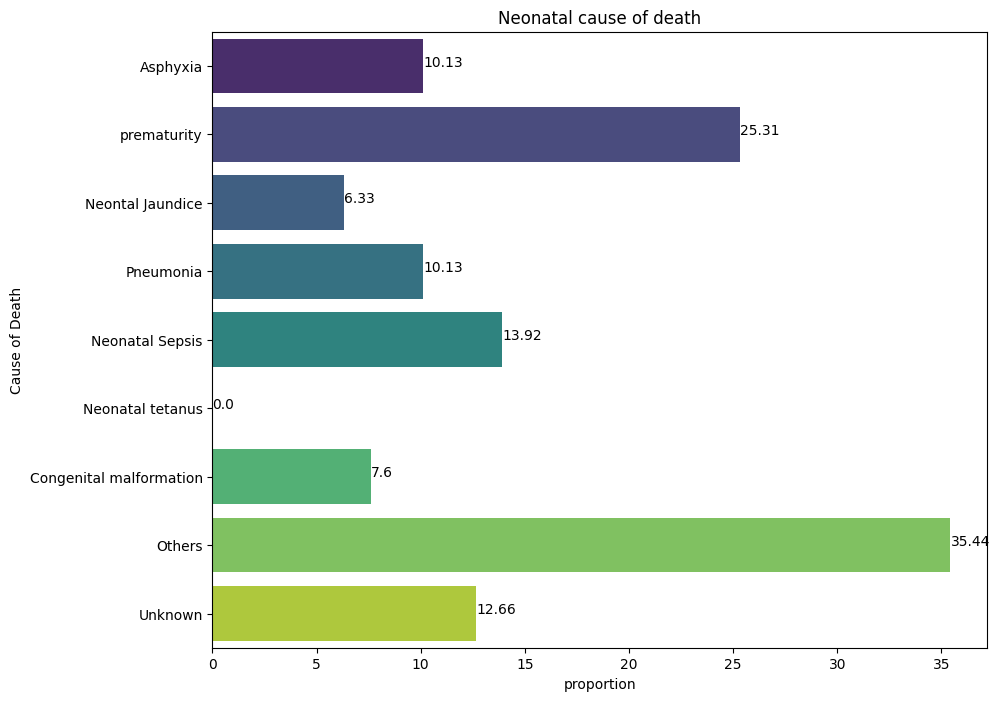

In [272]:
plt.figure(figsize=(10,8))
sns.barplot(result, x="proportion", y="Cause of Death",palette='viridis').set_title('Neonatal cause of death')
y=result['proportion']
for index, value in enumerate(y):
    plt.text(value, index,str(value))
plt.show()

In [ ]:
#Total Number of death from cc1_1 forms 
4634-data['cddeath_cf1_1'].isnull().sum()

In [41]:
#NC2=Neonatal Follow-up: Day 6, 28, 42 Community
#NF2=Neonatal Follow-up: Day 6, 28, 42 Facility
#NC2-Nf2

data['cddeath_nc2_nf2_1'].isnull().sum()

4611

In [318]:
data['cddeath_nc2_nf2_2'].isnull().sum()

4629

In [44]:
data['cddeath_nc2_nf2_3'].isnull().sum()

4632

In [312]:
#Total Number of death
4634-data['cddeath_nc2_nf2_1'].isnull().sum()

23

In [314]:
#Total Number of death
4634-data['cddeath_nc2_nf2_2'].isnull().sum()

5

In [320]:
#Total Number of death
4634-data['cddeath_nc2_nf2_3'].isnull().sum()

2

In [326]:
#NC3=Neonatal morbidity (Community)
data['cddeath_nc3_1'].isnull().sum()

4627

In [331]:
data['cddeath_nc3_2'].isnull().sum()

4633

In [327]:
#Total Number of death
4634-data['cddeath_nc3_1'].isnull().sum()

7

In [332]:
#Total Number of death
4634-data['cddeath_nc3_2'].isnull().sum()

1

In [337]:
#NF3: Neonatal outpatient visit
data['cddeath_nf3_1'].isnull().sum()

4632

In [338]:
4634-data['cddeath_nf3_1'].isnull().sum()

2

In [344]:
#NF5: Neonatal discharge
data['cddeath_nf5_1'].isnull().sum()

4622

In [346]:
data['cddeath_nf5_2'].isnull().sum()

4631

In [11]:
4634-data['cddeath_nf5_1'].isnull().sum()

12

In [10]:
4634-data['cddeath_nf5_2'].isnull().sum()

3

In [ ]:
#NF5_1 cause of death
#codo_nf5_1....for specify others
#coduk_nf5_1...for cause of death unknown


In [12]:
df=pd.DataFrame(data[['cddeath_nf5_1','codbirthasphyx_nf5_1','codpremature_nf5_1','codjdice_nf5_1','codpna_nf5_1','codsepsis_nf5_1','codtetanus_nf5_1','codcongenmal_nf5_1','codo_nf5_1','coduk_nf5_1']])

In [13]:
df1 = df[df.notnull().all(axis=1)]

In [16]:
df1

,cddeath_nf5_1,codbirthasphyx_nf5_1,codpremature_nf5_1,codjdice_nf5_1,codpna_nf5_1,codsepsis_nf5_1,codtetanus_nf5_1,codcongenmal_nf5_1,codo_nf5_1,coduk_nf5_1
75,30mar2019,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
88,20jan2020,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
149,16oct2019,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1188,14feb2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1810,03nov2019,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2881,19may2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3135,01dec2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3341,24dec2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3590,06dec2019,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3632,15apr2019,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#NF5_2 cause of death

In [18]:
df2=pd.DataFrame(data[['cddeath_nf5_2','codbirthasphyx_nf5_2','codpremature_nf5_2','codjdice_nf5_2','codpna_nf5_2','codsepsis_nf5_2','codtetanus_nf5_2','codcongenmal_nf5_2']])

In [19]:
df3 = df2[df2.notnull().all(axis=1)]

In [22]:
df3

,cddeath_nf5_2,codbirthasphyx_nf5_2,codpremature_nf5_2,codjdice_nf5_2,codpna_nf5_2,codsepsis_nf5_2,codtetanus_nf5_2,codcongenmal_nf5_2
403,20jun2019,1.0,0.0,0.0,0.0,1.0,0.0,0.0
473,26jan2020,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2264,29jul2019,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#cddeath_nc3_1 cause of death
#codo_nc3_1....for specify others
#coduk_nc3_1...for cause of death unknown

In [36]:
datanc3=pd.DataFrame(data[['cddeath_nc3_1','codbirthasphyx_nc3_1','codpremature_nc3_1','codjdice_nc3_1','codpna_nc3_1','codsepsis_nc3_1','codtetanus_nc3_1','codcongenmal_nc3_1','codo_nc3_1','coduk_nc3_1']])

In [37]:
datanc = datanc3[datanc3.notnull().all(axis=1)]

In [39]:
datanc

,cddeath_nc3_1,codbirthasphyx_nc3_1,codpremature_nc3_1,codjdice_nc3_1,codpna_nc3_1,codsepsis_nc3_1,codtetanus_nc3_1,codcongenmal_nc3_1,codo_nc3_1,coduk_nc3_1
311,06nov2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1259,19mar2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1753,27nov2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3263,03jul2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4343,06jun2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4429,26sep2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4631,26jul2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [575]:
#cddeath_nc3_2
datanc2=pd.DataFrame(data[['cddeath_nc3_2','codbirthasphyx_nc3_2','codpremature_nc3_2','codjdice_nc3_2','codpna_nc3_2','codsepsis_nc3_2','codtetanus_nc3_2','codcongenmal_nc3_2','codo_nc3_2','coduk_nc3_2']])

In [576]:
datanc2 =datanc2[datanc2.notnull().all(axis=1)]

In [577]:
datanc2

,cddeath_nc3_2,codbirthasphyx_nc3_2,codpremature_nc3_2,codjdice_nc3_2,codpna_nc3_2,codsepsis_nc3_2,codtetanus_nc3_2,codcongenmal_nc3_2,codo_nc3_2,coduk_nc3_2
2961,27may2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#NC2=Neonatal Follow-up: Day 6, 28, 42 Community
#NF2=Neonatal Follow-up: Day 6, 28, 42 Facility
#NC2-Nf2


In [578]:
#cddeath_nc2_nf2_1
datanc2f2=pd.DataFrame(data[['cddeath_nc2_nf2_1','codbirthasphyx_nc2_nf2_1','codpremature_nc2_nf2_1','codjdice_nc2_nf2_1','codpna_nc2_nf2_1','codsepsis_nc2_nf2_1','codtetanus_nc2_nf2_1','codcongenmal_nc2_nf2_1','codo_nc2_nf2_1','coduk_nc2_nf2_1']])

In [579]:
datanc2f2 =datanc2f2[datanc2f2.notnull().all(axis=1)]

In [580]:
datanc2f2

,cddeath_nc2_nf2_1,codbirthasphyx_nc2_nf2_1,codpremature_nc2_nf2_1,codjdice_nc2_nf2_1,codpna_nc2_nf2_1,codsepsis_nc2_nf2_1,codtetanus_nc2_nf2_1,codcongenmal_nc2_nf2_1,codo_nc2_nf2_1,coduk_nc2_nf2_1
52,09may2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,16jun2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,16oct2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
197,26jan2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,16jul2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
905,03jun2019,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2044,18oct2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2465,28aug2019,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2565,16nov2018,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2589,18nov2018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [587]:
#cddeath_nc2_nf2_2
datanc1f1=pd.DataFrame(data[['cddeath_nc2_nf2_2','codbirthasphyx_nc2_nf2_2','codpremature_nc2_nf2_2','codjdice_nc2_nf2_2','codpna_nc2_nf2_2','codsepsis_nc2_nf2_2','codtetanus_nc2_nf2_2','codcongenmal_nc2_nf2_2','codo_nc2_nf2_2','coduk_nc2_nf2_2']])

In [588]:
datanc1f1 =datanc1f1[datanc1f1.notnull().all(axis=1)]

In [589]:
datanc1f1

,cddeath_nc2_nf2_2,codbirthasphyx_nc2_nf2_2,codpremature_nc2_nf2_2,codjdice_nc2_nf2_2,codpna_nc2_nf2_2,codsepsis_nc2_nf2_2,codtetanus_nc2_nf2_2,codcongenmal_nc2_nf2_2,codo_nc2_nf2_2,coduk_nc2_nf2_2
652,13oct2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3643,16nov2019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4170,24apr2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4172,23apr2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4582,21apr2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [591]:
#cddeath_nc2_nf2_3
datanc1f3=pd.DataFrame(data[['cddeath_nc2_nf2_3','codbirthasphyx_nc2_nf2_3','codpremature_nc2_nf2_3','codjdice_nc2_nf2_3','codpna_nc2_nf2_3','codsepsis_nc2_nf2_3','codtetanus_nc2_nf2_3','codcongenmal_nc2_nf2_3','codo_nc2_nf2_3','coduk_nc2_nf2_3']])

In [592]:
datanc1f3 =datanc1f3[datanc1f3.notnull().all(axis=1)]

In [593]:
datanc1f3

,cddeath_nc2_nf2_3,codbirthasphyx_nc2_nf2_3,codpremature_nc2_nf2_3,codjdice_nc2_nf2_3,codpna_nc2_nf2_3,codsepsis_nc2_nf2_3,codtetanus_nc2_nf2_3,codcongenmal_nc2_nf2_3,codo_nc2_nf2_3,coduk_nc2_nf2_3
2598,25dec2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3934,28jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [515]:

#b: variables included in birth forms BF1 and BC1
   #•	BF1: Birth – catchment and non-catchment 
   #•	BC1: Births
data['cddeath_b'].isnull().sum()

4548

In [248]:
#.....From BC1 Birth Facility
#label define n_death_cause  of infant
#1 "neonatal sepsis" 
#2 "preterm" 
#3 "asphyxia" 
#4 "lowbirth weight" 
#5 "neonatal conjunctivitis" 
#6 "neonatal tetanus" 
#7 "neonatal herpes" 
#8 "neonatal meningitis" 
#9 "neontal jaundice" 
#10 "respiratory distress syndrome" 
#11 "congenital malformation" 
#12 "other specify"
#88: Unknown

dfb=pd.DataFrame(data[['cddeath_b','ccod_b']])

In [249]:
dfb = dfb[dfb.notnull().all(axis=1)]

In [250]:
len(dfb)

84

In [252]:
dfb.head(50)

,cddeath_b,ccod_b
4,06feb2020,12.0
10,27oct2019,88.0
36,18mar2020,1.0
63,11mar2019,12.0
119,11feb2020,3.0
164,25aug2019,10.0
204,25jun2019,4.0
205,25jun2019,4.0
353,09mar2020,88.0
441,19aug2019,3.0


In [253]:
Infant_causeofdeath=dfb  

#1 "neonatal sepsis" 
#2 "preterm" 
#3 "asphyxia" 
#4 "lowbirth weight" 
#5 "neonatal conjunctivitis" 
#6 "neonatal tetanus" 
#7 "neonatal herpes" 
#8 "neonatal meningitis" 
#9 "neontal jaundice" 
#10 "respiratory distress syndrome" 
#11 "congenital malformation" 

In [257]:
#data.replace(49.50, 60)
Infant_causeofdeath['ccod_b'] = Infant_causeofdeath['ccod_b'].replace([1.0], 'neonatal sepsis')
Infant_causeofdeath['ccod_b'] = Infant_causeofdeath['ccod_b'].replace([2.0], 'preterm')
Infant_causeofdeath['ccod_b'] = Infant_causeofdeath['ccod_b'].replace([3.0], 'asphyxia')
Infant_causeofdeath['ccod_b'] = Infant_causeofdeath['ccod_b'].replace([4.0], 'lowbirth weight')
Infant_causeofdeath['ccod_b'] = Infant_causeofdeath['ccod_b'].replace([5.0], 'neonatal conjunctivitis')
Infant_causeofdeath['ccod_b'] = Infant_causeofdeath['ccod_b'].replace([6.0], 'neonatal tetanus')
Infant_causeofdeath['ccod_b'] = Infant_causeofdeath['ccod_b'].replace([7.0], 'neonatal herpes')
Infant_causeofdeath['ccod_b'] = Infant_causeofdeath['ccod_b'].replace([8.0], 'neonatal meningitis')
Infant_causeofdeath['ccod_b'] = Infant_causeofdeath['ccod_b'].replace([9.0], 'neontal jaundice')
Infant_causeofdeath['ccod_b'] = Infant_causeofdeath['ccod_b'].replace([10.0], 'respiratory distress syndrome')
Infant_causeofdeath['ccod_b'] = Infant_causeofdeath['ccod_b'].replace([11.0], 'congenital malformation')
Infant_causeofdeath['ccod_b'] = Infant_causeofdeath['ccod_b'].replace([12.0], 'Others')
Infant_causeofdeath['ccod_b'] = Infant_causeofdeath['ccod_b'].replace([88.0], 'Unknown')

In [ ]:
#11 "congenital malformation" 
#12 "other specify"
#88: Unknown

In [255]:
Infant_causeofdeath['ccod_b'] = Infant_causeofdeath['ccod_b'].replace([66.0], 'Unknown')

In [258]:
Infant_causeofdeath.head(50)

,cddeath_b,ccod_b
4,06feb2020,Others
10,27oct2019,Unknown
36,18mar2020,neonatal sepsis
63,11mar2019,Others
119,11feb2020,asphyxia
164,25aug2019,respiratory distress syndrome
204,25jun2019,lowbirth weight
205,25jun2019,lowbirth weight
353,09mar2020,Unknown
441,19aug2019,asphyxia


<Axes: ylabel='ccod_b'>

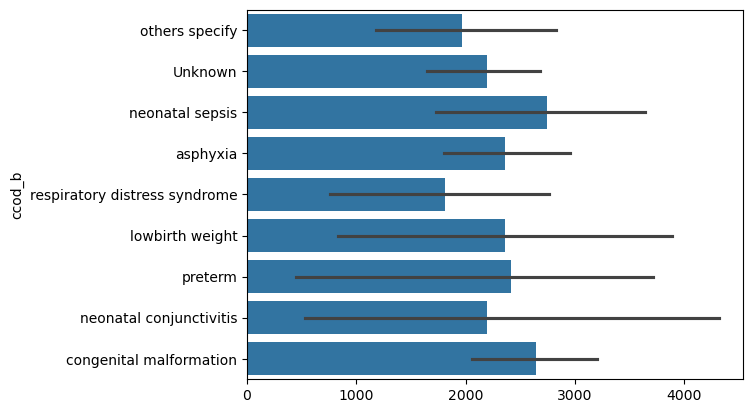

In [523]:
sns.barplot(causeofdeath["ccod_b"])

<Axes: xlabel='count', ylabel='ccod_b'>

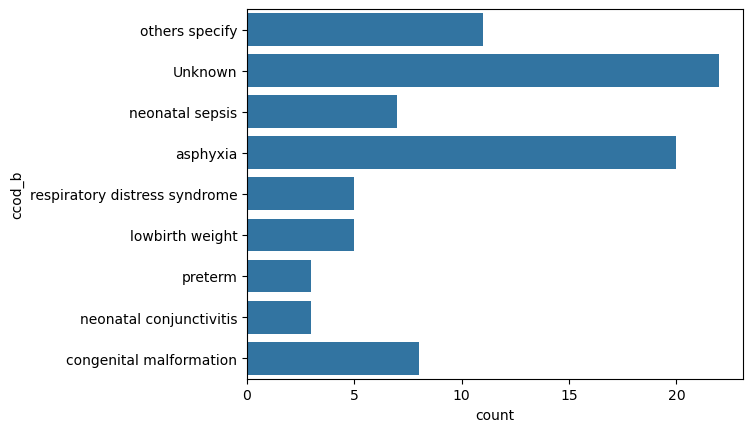

In [527]:
sns.countplot(causeofdeath.ccod_b)

In [261]:
Infant_causeofdeath.rename(columns={"ccod_b": "Cause_of_death"}, inplace=True)

In [262]:
count_cd=Infant_causeofdeath.groupby(['Cause_of_death']).count().rename(columns={'ccod_b':'cause of death'}).reset_index()


In [264]:
count_cd

,Cause_of_death,cddeath_b
0,Others,11
1,Unknown,22
2,asphyxia,20
3,congenital malformation,8
4,lowbirth weight,5
5,neonatal conjunctivitis,3
6,neonatal sepsis,7
7,preterm,3
8,respiratory distress syndrome,5


In [279]:
count_cd['proportion_of_cause']=round(count_cd['cddeath_b']/84 *100,2)

In [280]:
count_cd

,Cause_of_death,cddeath_b,proportion_of_cause
0,Others,11,13.10
1,Unknown,22,26.19
2,asphyxia,20,23.81
3,congenital malformation,8,9.52
4,lowbirth weight,5,5.95
5,neonatal conjunctivitis,3,3.57
6,neonatal sepsis,7,8.33
7,preterm,3,3.57
8,respiratory distress syndrome,5,5.95


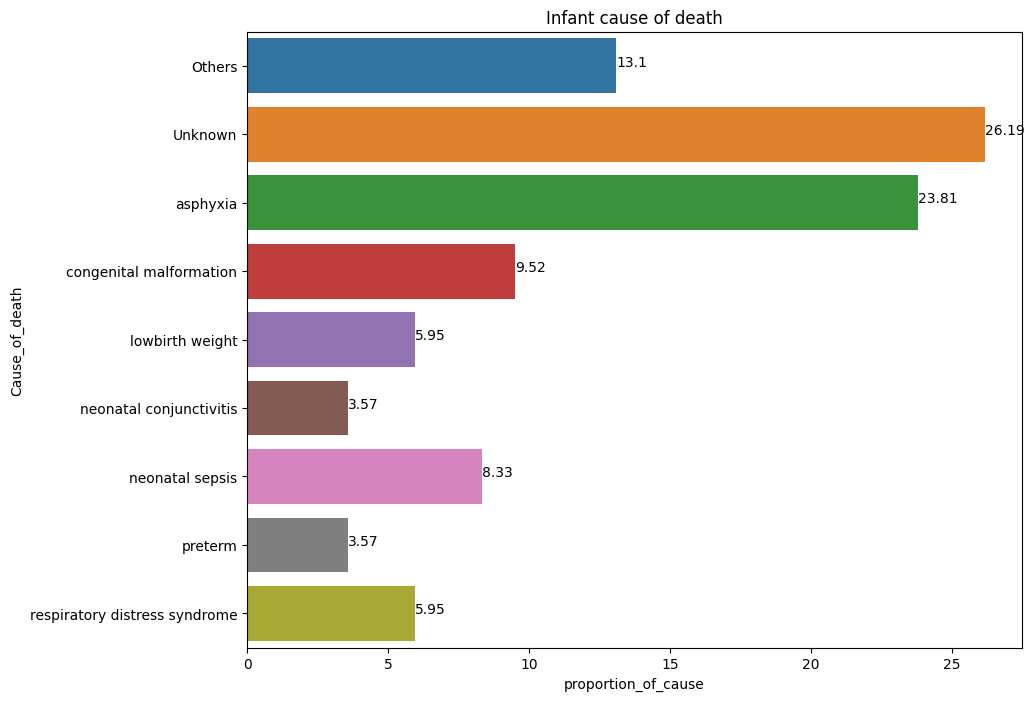

In [281]:
plt.figure(figsize=(10,8))
sns.barplot(count_cd, x="proportion_of_cause", y="Cause_of_death",orient="h" 
            ).set_title('Infant cause of death') 
y=count_cd['proportion_of_cause']
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.show()

In [427]:
data['rds_nf5_2'].isnull().sum()

4633

In [416]:
# propportion of null value for date of birth 
data['babydob_enroll'].isnull().sum()/4634

0.7904618040569702

In [417]:
#proposrtion of null value on sex
data['babysex_enroll'].isnull().sum()/4634

0.7904618040569702

In [176]:
data.columns[1300:1400]

Index(['ultrsdbdc_pf3_1', 'ultrsdd_pf3_1', 'gawk_pf3_1', 'gad_pf3_1',
       'nfetus_pf3_1', 'prevvisit_pf3_1', 'oant3mo_pf3_1', 'ntoant_pf3_1',
       'oant1_pf3_1', 'oant1i_pf3_1', 'ivimant3mo_pf3_1', 'ftlhb_pf3_1',
       'stlexmfos_pf3_1', 'oant1s_pf3_1', 'oant1is_pf3_1', 'oant2_pf3_1',
       'oant2i_pf3_1', 'oant2is_pf3_1', 'ntivimant_pf3_1', 'ivimant1_pf3_1',
       'ivimant1i_pf3_1', 'ivimant1is_pf3_1', 'intdt_pf3_2', 'mresp_pf3_2',
       'enrollhosp_pf3_2', 'enrollhc_pf3_2', 'iron_pf3_2', 'folicac_pf3_2',
       'ironfa_pf3_2', 'endcase_pf3_2', 'metasubmissiondate_pf3_2',
       'metasubmissiontime_pf3_2', 'start_pf3_2', 'timec_pf3_2',
       'facility_pf3_2', 'hospital_pf3_2', 'healthcent_pf3_2', 'pallor_pf3_2',
       'uternh_pf3_2', 'vdate_pf3_2', 'galmpwk_pf3_2', 'galmpday_pf3_2',
       'sboodpr_pf3_2', 'dbloodpr_pf3_2', 'wt_pf3_2', 'ttv_pf3_2', 'mvi_pf3_2',
       'itn_pf3_2', 'marvpx_pf3_2', 'carvtx_pf3_2', 'stoolexm_pf3_2',
       'stoolneg_pf3_2', 'stoolhw_pf3_2', 's

In [221]:
#data['codbirthasphyx_nc2_nf2_1'].head(10)
#data['codbirthasphyx_nc3_1'].tail(10)
#data['codbirthasphyx_nf3_1'].tail(10)
#data['codbirthasphyx_nf5_1'].tail(20)
data['codbirthasphyx_cc1_1'].isnull().sum()

4621

In [181]:
data['codbirthasphyx_cc2_1'].isnull().sum()

4622

In [182]:
data['codbirthasphyx_cf1_1'].isnull().sum()

4634

In [183]:
data['asphyxia_nc1_nf1_1'].isnull().sum()

4571

In [184]:
data['asphyxia_nf3_1'].isnull().sum()

4583

In [185]:
data['asphyxia_nf4_1'].isnull().sum()

4552

In [186]:
data['asphyxia_nf5_1'].isnull().sum() 

4575

In [187]:
data['codbirthasphyx_nc3_2'].isnull().sum() 

4633

In [266]:
#if died, date of death: note from here we can find how many has died
data['cddeath_nc3_1'].isnull().sum() 

4627

In [264]:
#if died, date of death: note from here we can find how many has died
data['cddeath_nc3_2'].isnull().sum() 

4633

In [203]:
#aphyxia cause of death
data['codbirthasphyx_nf3_1'].isnull().sum() 

4632

In [213]:
#aphyxia cause of death
data['codbirthasphyx_nf5_1'].isnull().sum() 

4622

In [214]:
#aphyxia cause of death
data['codbirthasphyx_nf5_2'].isnull().sum() 

4631

In [216]:
#pnuemonia cause of death
data['codpna_nf3_1'].isnull().sum() 

4632

In [218]:
#pnuemonia cause of death
data['codpna_nf5_1'].isnull().sum() 

4622

In [226]:
#pnuemonia cause of death
data['codpna_nf5_2'].isnull().sum() 

4631

In [224]:
data[['codpna_nf5_2','codbirthasphyx_nf3_1']].head()

,codpna_nf5_2,codbirthasphyx_nf3_1
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [189]:
child=pd.read_csv('core_child_wide.csv')

/var/folders/cz/fk8gczx52ss7yswk1p4l28km0000gn/T/ipykernel_87834/546080137.py:1: DtypeWarning: Columns (4,89,128,131,215,252,255,369,378,491,492,499,502,556,615,616,623,626,679,707,736,737,759,762,763,767,769,771,773,775,777,779,781,783,785,787,789,791,794,795,797,826,830,831,834,838,840,842,844,846,848,850,852,854,856,858,860,862,875,876,878,879,880,882,908,929,931,932,933,935,951,952,953,954,956,957,959,964,966,968,970,971,975,977,1012,1041,1044,1059,1060,1061,1063) have mixed types. Specify dtype option on import or set low_memory=False.
  child=pd.read_csv('core_child_wide.csv')


In [190]:
child.shape

(7109, 1064)

In [196]:
child.columns[0:100]

Index(['uuid', 'intdt_H2_1', 'times_H2_1', 'source_H2_1', 'sourceo_H2_1',
       'health3mo_H2_1', 'illcause_H2_1', 'illcauseo_H2_1', 'tr_H2_1',
       'trloc_H2_1', 'seektrd_H2_1', 'sick2wks_H2_1', 'dcvisit2wks_H2_1',
       'di2wks_H2_1', 'didur_H2_1', 'digt2wks_H2_1', 'ndieps_H2_1',
       'didrmilk_H2_1', 'didrcer_H2_1', 'didrhf_H2_1', 'didrors_H2_1',
       'didromilk_H2_1', 'didrfeedw_H2_1', 'didrw_H2_1', 'didrunacc_H2_1',
       'didruk_H2_1', 'dididr_H2_1', 'didieat_H2_1', 'distoolblood_H2_1',
       'divom_H2_1', 'divomd_H2_1', 'ndivomeps_H2_1', 'divomblood_H2_1',
       'ditr_H2_1', 'ditrloc_H2_1', 'diseektrd_H2_1', 'ditrout_H2_1',
       'fe2wks_H2_1', 'fedur_H2_1', 'fetempm_H2_1', 'fetr_H2_1',
       'fetrloc_H2_1', 'feseektrd_H2_1', 'fetrout_H2_1', 'ferefer_H2_1',
       'ferefero_H2_1', 'co2wks_H2_1', 'cobdif_H2_1', 'cocold_H2_1',
       'cogrunt_H2_1', 'cotr_H2_1', 'cotrloc_H2_1', 'coseektrd_H2_1',
       'cotrout_H2_1', 'corefer_H2_1', 'corefero_H2_1', 'vac_H2_1',
     

In [195]:
child['health3mo_H2_1'].isnull().sum() 

198

In [271]:
corewomen=pd.read_csv('core_women_wide.csv',low_memory=False)

In [272]:
corewomen.shape  

(21650, 848)

In [279]:
corewomen['codnb_D3_1'].isnull().sum()

21626

In [275]:
core=corewomen['codnb_D3_1'].dropna(axis=0, how='any')

In [278]:
len(core)

24

In [284]:
data['cddeath_nc3_1'].isnull().sum()

4627

In [286]:
data['cddeath_nc3_2'].isnull().sum()

4633

In [289]:
data['cddeath_nf3_1'].isnull().sum()

4632

In [293]:
data['cddeath_nf5_1'].isnull().sum()

4622

In [294]:
data['cddeath_nf5_2'].isnull().sum()

4631

In [274]:
corewomen['codnb_D3_1'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: codnb_D3_1, dtype: float64

In [253]:
y.shape

AttributeError: 'function' object has no attribute 'shape'